<center>
    <img src="https://upload.wikimedia.org/wikipedia/vi/1/1d/Logo_%C4%90%E1%BA%A1i_h%E1%BB%8Dc_FPT.png" width="300"/>
    <h1><a id = "start">Mini Capstone</a></h1>
    <h2>Hồ Việt Dũng - HE179008 - AI1703 - Mini Capstone</h2>
</center>

<a id='import_lib'></a>
# 1. Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<a id='Read_Data'></a>
# 2. Read Dataset :

In [2]:
rating_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv'
rating_df = pd.read_csv(rating_url)
rating_df

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
...,...,...,...
233301,1540125,DS0101EN,3.0
233302,1250651,PY0101EN,3.0
233303,1003832,CB0105ENv1,3.0
233304,922065,BD0141EN,3.0


<a id='convert_matrix'></a>
### 2.1 Convert to matrix :

In [3]:
rating_df1 = rating_df.copy()

In [4]:
rating_df2=pd.crosstab( rating_df1['user'],rating_df1['item'],rating_df1.rating,aggfunc='sum')

In [5]:
rating_df2

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,NaN,3.0,NaN,NaN,3.0,2.0,NaN,2.0,2.0,3.0,...,NaN,2.0,NaN,3.0,NaN,2.0,2.0,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0
5,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='choose_least_missing_cols'></a>
### 2.2 Choose Least Missing Columns :

In [6]:
null_list=[]
col_list=[]
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >=0 :
            null_list.append(missing_count*100/n_rows)
            if missing_count*100/n_rows <76 :
                col_list.append(col)
display_missing(rating_df2, rating_df2.columns)

In [7]:
np.sort(null_list)

array([55.94230259, 57.29624495, 60.79466682, 68.73543553, 75.50809711,
       77.23076015, 77.45199257, 77.72632076, 78.76463821, 80.18052565,
       80.2100233 , 81.34863278, 83.7408926 , 84.55207811, 85.20692605,
       85.30131855, 86.78505059, 89.09471697, 89.17436064, 89.31004985,
       91.02091384, 91.15070352, 91.45747913, 91.51352467, 91.52532374,
       91.5459721 , 91.97368809, 92.32765995, 92.43385151, 93.09754874,
       93.15359429, 93.37187694, 93.37187694, 93.56951122, 94.12406714,
       94.46623993, 94.57833102, 94.83791039, 95.25677709, 95.27447568,
       95.4013156 , 95.91457479, 96.02666588, 96.1535058 , 96.30984337,
       96.47798   , 96.62251851, 96.63726734, 96.6490664 , 96.65201616,
       96.68446359, 96.85260022, 96.92044482, 96.96174154, 97.00598802,
       97.22427067, 97.30981387, 97.58709183, 97.71393174, 97.78177635,
       98.05315477, 98.10920032, 98.11215008, 98.14754727, 98.27143742,
       98.29208578, 98.34813132, 98.35403085, 98.43367452, 98.43

**Chose 5 columns that has least missing values**

In [8]:
col_list

['BD0101EN', 'BD0111EN', 'DA0101EN', 'DS0101EN', 'PY0101EN']

In [9]:
rating_df3=rating_df2[['BD0101EN', 'BD0111EN', 'DA0101EN', 'DS0101EN', 'PY0101EN']]
rating_df3

item,BD0101EN,BD0111EN,DA0101EN,DS0101EN,PY0101EN
user,,,,,
2,3.0,2.0,3.0,NaN,3.0
4,2.0,2.0,NaN,2.0,2.0
5,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...
2102054,NaN,NaN,NaN,3.0,NaN
2102356,NaN,NaN,NaN,NaN,NaN
2102680,NaN,NaN,NaN,3.0,3.0


<a id='choose_rows'></a>
### 2.3 Choose Rows :
* Choose row that have 0-3 missing value

In [10]:
missing_values=rating_df3.isna().sum(axis=1) >=4
rows_with_missing = rating_df3[missing_values]

In [11]:
rows_with_missing

item,BD0101EN,BD0111EN,DA0101EN,DS0101EN,PY0101EN
user,,,,,
5,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2101673,NaN,NaN,NaN,NaN,NaN
2102054,NaN,NaN,NaN,3.0,NaN
2102356,NaN,NaN,NaN,NaN,NaN


In [12]:
rating_df4=rating_df3[~missing_values]
rating_df4

item,BD0101EN,BD0111EN,DA0101EN,DS0101EN,PY0101EN
user,,,,,
2,3.0,2.0,3.0,NaN,3.0
4,2.0,2.0,NaN,2.0,2.0
9,2.0,2.0,NaN,NaN,NaN
16,3.0,NaN,NaN,NaN,3.0
28,2.0,2.0,NaN,2.0,2.0
...,...,...,...,...,...
2099010,NaN,NaN,3.0,3.0,NaN
2099019,NaN,NaN,3.0,3.0,3.0
2100731,NaN,NaN,3.0,3.0,3.0


<a id='find_missing'></a>
### 2.4 Missing Values :

In [13]:
def display_missing2(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >= 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing2(rating_df4, rating_df4.columns)

BD0101EN has 35.90% missing values.
BD0111EN has 48.75% missing values.
DA0101EN has 57.66% missing values.
DS0101EN has 35.77% missing values.
PY0101EN has 28.87% missing values.


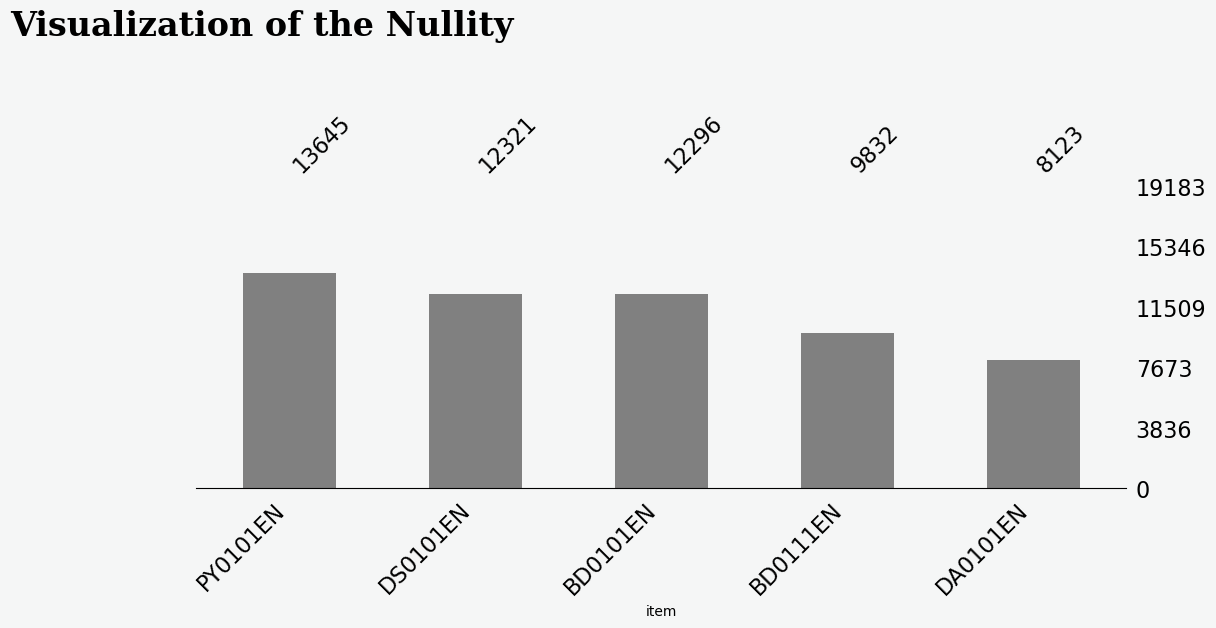

In [14]:
import matplotlib.pyplot as plt
import missingno as msno
fig, ax = plt.subplots(dpi = 100,figsize = (12,4))
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# column names
null_col_list = (((rating_df4.isnull().sum()).to_frame()).sort_values(by =0)).T.columns.tolist()
color = [ 'grey' if (rating_df4[col].isnull().sum()) > 0 else 'lightpink' for col in null_col_list]

## plotting
ax.axvspan(xmin = 5.5, xmax = 9.5, color = 'grey',alpha = 0.3)
msno.bar(rating_df4,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))

## plotsetting

ax.text(-1.5,1.5,'Visualization of the Nullity' ,{'font':'serif', 'color':'black','weight':'bold','size':24},alpha = 1)

ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

<a id='find_mean'></a>
### 2.5 Find mean of Item to identify the quality :

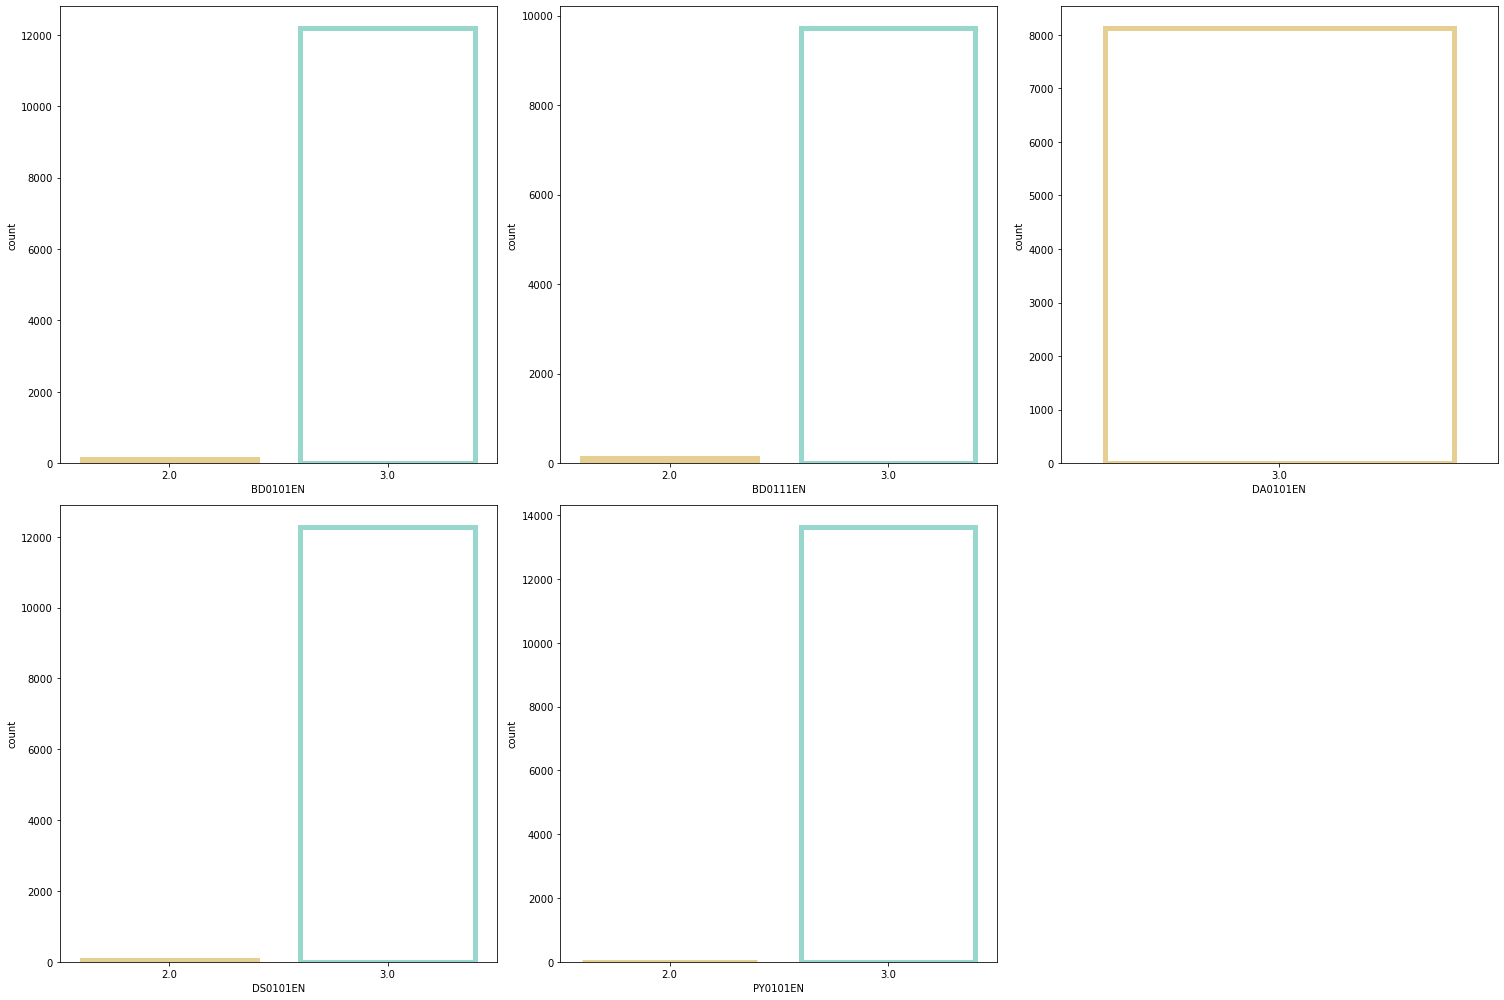

In [15]:
cols = ['BD0101EN', 'BD0111EN', 'DA0101EN', 'DS0101EN', 'PY0101EN']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(x=cols[i], data=rating_df4, color="salmon", facecolor=(0, 0, 0, 0),
                       linewidth=5,ax=ax_i,
                       edgecolor=sns.color_palette("BrBG", 2));
            
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

In [16]:
mean_row = rating_df4.mean().to_frame().transpose()
mean_row.index = ['mean']
df_with_mean = rating_df4.append(mean_row)
df_with_mean

item,BD0101EN,BD0111EN,DA0101EN,DS0101EN,PY0101EN
2,3.000000,2.000000,3.0,NaN,3.000000
4,2.000000,2.000000,NaN,2.000000,2.000000
9,2.000000,2.000000,NaN,NaN,NaN
16,3.000000,NaN,NaN,NaN,3.000000
28,2.000000,2.000000,NaN,2.000000,2.000000
...,...,...,...,...,...
2099019,NaN,NaN,3.0,3.000000,3.000000
2100731,NaN,NaN,3.0,3.000000,3.000000
2101601,NaN,NaN,NaN,3.000000,3.000000
2102680,NaN,NaN,NaN,3.000000,3.000000


In [17]:
df_with_mean=df_with_mean.transpose()
df_with_mean

,2,4,9,16,28,35,38,40,43,44,...,2097374,2097481,2097904,2098743,2099010,2099019,2100731,2101601,2102680,mean
item,,,,,,,,,,,,,,,,,,,,,
BD0101EN,3.0,2.0,2.0,3.0,2.0,2.0,NaN,2.0,2.0,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.991054
BD0111EN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.988609
DA0101EN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,3.0,3.0,3.0,3.0,NaN,NaN,3.000000
DS0101EN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.996754
PY0101EN,3.0,2.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,3.0,NaN,3.0,3.0,3.0,3.0,2.999414


**Export to CSV in oder to import in SQL**

In [18]:
#df_with_mean['mean'].to_csv('df1.csv')

<a id='find_mean2'></a>
### 2.6 Find mean of user to indentify user :

In [19]:
rating_df5=pd.crosstab( rating_df1['item'],rating_df1['user'],rating_df1.rating,aggfunc='sum')
rating_df5

user,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039
item,,,,,,,,,,,,,,,,,,,,,
AI0111EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0101EN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0201EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0202EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
BD0101EN,3.0,2.0,2.0,NaN,NaN,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMP0105EN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TMP0106,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TMP107,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
mean_row2 = rating_df5.mean().to_frame().transpose()
mean_row2.index = ['mean']
df_with_mean2 = rating_df5.append(mean_row2)
df_with_mean2

user,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039
AI0111EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0101EN,3.000000,NaN,2.0,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0201EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0202EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
BD0101EN,3.000000,2.0,2.0,NaN,NaN,2.0,NaN,3.000000,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMP0106,2.000000,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TMP107,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WA0101EN,3.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WA0103EN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_with_mean2

user,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039
AI0111EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0101EN,3.000000,NaN,2.0,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0201EN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC0202EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
BD0101EN,3.000000,2.0,2.0,NaN,NaN,2.0,NaN,3.000000,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMP0106,2.000000,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TMP107,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WA0101EN,3.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WA0103EN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_with_mean2=df_with_mean2.transpose()
df_with_mean2

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN,mean
user,,,,,,,,,,,,,,,,,,,,,
2,NaN,3.0,NaN,NaN,3.0,2.0,NaN,2.0,2.0,3.0,...,2.0,NaN,3.0,NaN,2.0,2.0,NaN,3.0,NaN,2.704918
4,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,2.000000
5,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
2102356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
2102680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.909091


**Export to CSV in oder to import in SQL**

In [23]:
#df_with_mean2['mean'].to_csv('df2.csv')

<a id='convert_back'></a>
### 2.7 Convert back to normal dataset:
**Connect to SQL Sever**

In [24]:
import pyodbc
#Replace the placeholder values with the actuals for your SQL Server connection properties
Server   = "LAPTOP-1H4DR4LR"
Database = "AIl303m"
UID      = ""
PWD      = ""

connection_str = ("Driver={SQL Server Native Client 11.0};"
                  "Server=" + Server + ";"
                  "Database=" + Database + ";"
                  "Trusted_Connection=yes;")
try:
    connection = pyodbc.connect(connection_str)
    print ("Connected to SQL database Server:", Server, "\nDatabase: " + Database)
except pyodbc.Error as ex:
    sqlstate = ex.args[1]
    print ("Unable to connect: ", sqlstate)

Connected to SQL database Server: LAPTOP-1H4DR4LR 
Database: AIl303m


**Query Converted Data**

In [25]:
query = '''select 
t3.user1,t3.item,m.rating,df11.mean 'item mean',df2.mean 'user mean'
from [mini capstone] m
right join
(select * from 
(select distinct user1 from [mini capstone]) as t1,
(select distinct item from [mini capstone] where item in ('BD0101EN', 'BD0111EN', 'DA0101EN', 'DS0101EN', 'PY0101EN')) as t2) as t3
on m.user1= t3.user1 and m.item=t3.item
inner join
df11 on t3.item=df11.item
inner join 
df2 on t3.user1=df2.user1'''

df_query = pd.read_sql(query, connection)
df_query

,user1,item,rating,item mean,user mean
0,2,BD0101EN,3.0,2.991054,2.704918
1,4,BD0101EN,2.0,2.991054,2.000000
2,5,BD0101EN,2.0,2.991054,2.000000
3,7,BD0101EN,NaN,2.991054,2.000000
4,8,BD0101EN,NaN,2.991054,2.000000
...,...,...,...,...,...
169500,2102054,PY0101EN,NaN,2.999414,3.000000
169501,2102356,PY0101EN,NaN,2.999414,2.000000
169502,2102680,PY0101EN,3.0,2.999414,2.909091
169503,2102983,PY0101EN,NaN,2.999414,2.000000


**Visuallize Nulity**

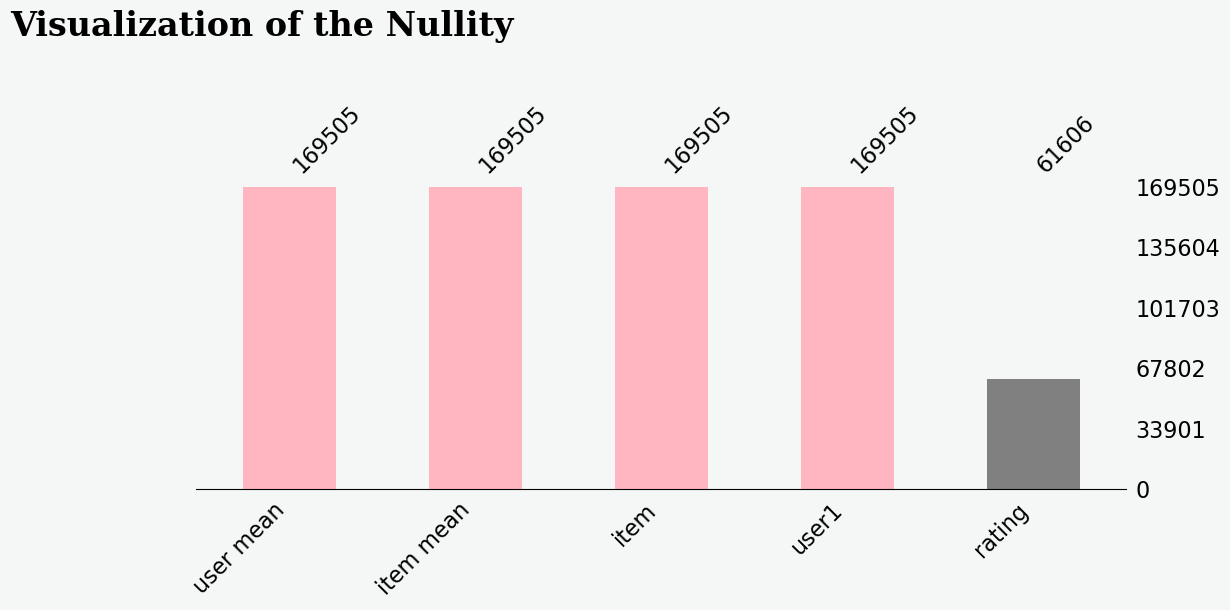

In [26]:
fig, ax = plt.subplots(dpi = 100,figsize = (12,4))
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# column names
null_col_list = (((df_query.isnull().sum()).to_frame()).sort_values(by =0)).T.columns.tolist()
color = [ 'grey' if (df_query[col].isnull().sum()) > 0 else 'lightpink' for col in null_col_list]

## plotting
ax.axvspan(xmin = 5.5, xmax = 9.5, color = 'grey',alpha = 0.3)
msno.bar(df_query,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))

## plotsetting

ax.text(-1.5,1.5,'Visualization of the Nullity' ,{'font':'serif', 'color':'black','weight':'bold','size':24},alpha = 1)

ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

### 2.8 Choose Test and Train set :

#### Chose none Null row for train and Null row for test

In [27]:
X_test=df_query[df_query['rating'].isna()]

#### Label Encode for Rating and Choose row for training

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X_train=df_query[~df_query['rating'].isna()]
X_train['rating']= label_encoder.fit_transform(X_train['rating'])

### Split train data

In [29]:
X_train_chose=X_train[['item mean','user mean']]
y_train_chose= X_train['rating']

### 2.9 Heat Map :

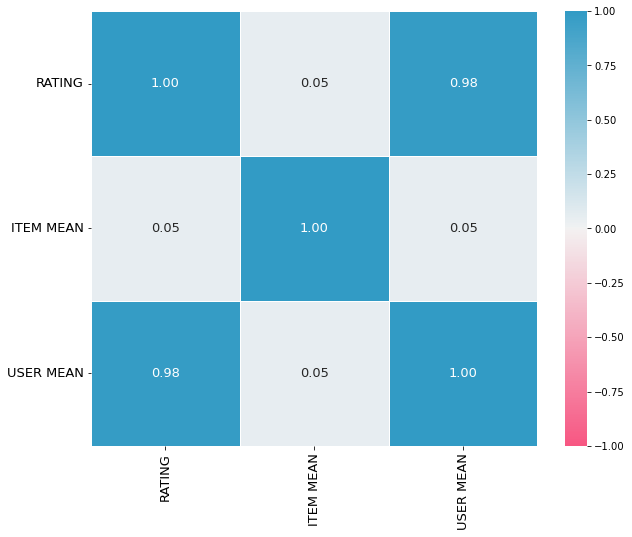

In [30]:
ele = ['rating','item mean','user mean']
cereal_df_new = X_train[ele]
cereal_corr = cereal_df_new.corr()

fig, ax = plt.subplots(figsize=(10,8))


#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=cereal_corr,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in cereal_corr.index]
xticks = [i.upper() for i in cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

### 2.10 Elbow :

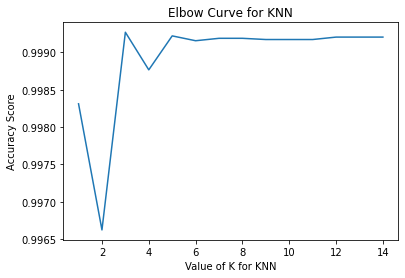

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize an empty list to store the accuracy scores for each value of k
accuracy_scores = []
k_range = range(1, 15)
# Iterate over the range of k values and fit the KNN model to the data
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_chose, y_train_chose)
    # Calculate the accuracy score for the model
    accuracy_scores.append(knn.score(X_train_chose, y_train_chose))

# Plot the elbow curve
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Elbow Curve for KNN')
plt.show()

# 3. Modeling :

### 3.1 Split Dataset :

In [32]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_chose,y_train_chose,test_size=0.2,random_state=43)

In [33]:
from sklearn.utils import resample
# Tách majority và minority class
majority_X = X_train_1[y_train_1==1]
majority_y = y_train_1[y_train_1==1]
minority_X = X_train_1[y_train_1==0]
minority_y = y_train_1[y_train_1==0]

# Downsample majority class thành 10 phần
n_samples = len(majority_y) // 10
downsampled_X = []
downsampled_y = []
for i in range(10):
    majority_X_downsampled, majority_y_downsampled = resample(majority_X, majority_y, 
                                                              n_samples=n_samples, 
                                                              random_state=i)
    downsampled_X.append(majority_X_downsampled)
    downsampled_y.append(majority_y_downsampled)

Em down sample làm 10 phần rồi train chung với bên ít rồi đi voting. Sau khi chia thì tỉ lệ minority và majority là khoảng 1:3. Nên em ko smote lên vì range của data từ (2 ; 3) nên scale data thì ko kéo dãn được khoảng cách nên smote sẽ sinh ra các data gần nhau và gần như là duplicate nên em ko smote bên ít lên nữa mà thay bằng điều chỉnh class weight để cho model bớt xu hướng dự đoán ra bên 3 hơn 

**KNN From Scratch**

In [85]:
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k
        self.weights = weights

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # Compute the weights for each class label
        if weights is not None:
            self.weights = weights
        else:
            self.weights = {0: 1.5, 1: 0.5}
        # return the most common class label, weighted by class weights if specified
        most_common = Counter({label: count * self.weights[label] for label, count in Counter(k_neighbor_labels).items()}).most_common(1)
        return most_common[0][0]


**Fit**

In [101]:
# Huấn luyện mô hình KNN trên từng phần downsampled majority class cùng với minority class

knn_models = []
for i in range(10):
    X_train_i = np.concatenate((minority_X, downsampled_X[i]))
    y_train_i = np.concatenate((minority_y, downsampled_y[i]))
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_i, y_train_i)
    knn_models.append(knn)

# Đánh giá mô hình trên tập test
y_preds = []
for knn_model in knn_models:
    y_pred = knn_model.predict(X_test_1)
    y_preds.append(y_pred)

In [103]:
from sklearn.metrics import accuracy_score
# Lấy ra class có số phiếu cao nhất (voting)
predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_preds)
accuracy = accuracy_score(y_test_1, predictions)
accuracy

0.9968349293945789

In [86]:
weights = {0: 1.5, 1: 0.5}
knn_models = []
for i in range(10):
    X_train_i = np.concatenate((minority_X, downsampled_X[i]))
    y_train_i = np.concatenate((minority_y, downsampled_y[i]))
    
    knn1 = KNN(k=5)
    knn1.fit(X_train_i, y_train_i)
    knn_models.append(knn1)

# Đánh giá mô hình trên tập test
predictions1 = []
for knn_model in knn_models:
    predictions1s = knn_model.predict(X_test_1.values)
    predictions1.append(predictions1s)

In [87]:
predictions1 = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions1)
accuracy = accuracy_score(y_test_1, predictions1)
accuracy

0.9918844343450739

In [88]:
from sklearn import metrics
data = {'Value': ['Score','MAE','MSE',"RMSE"],  
        'KNN build by me' : [accuracy_score(y_test_1, pd.DataFrame(predictions1, columns=['rating'])),
                             metrics.mean_absolute_error(y_test_1, predictions1),metrics.mean_squared_error(y_test_1, predictions1),
                             np.sqrt(metrics.mean_squared_error(y_test_1, predictions1))],
        'Framework':[knn.score(X_test_1,y_test_1),metrics.mean_absolute_error(y_test_1, predictions),
                     metrics.mean_squared_error(y_test_1, predictions),np.sqrt(metrics.mean_squared_error(y_test_1, predictions))]}
df_compare = pd.DataFrame(data)
df_compare

,Value,KNN build by me,Framework
0,Score,0.991884,0.996997
1,MAE,0.008116,0.003165
2,MSE,0.008116,0.003165
3,RMSE,0.090086,0.056259


### Confusion Matrix

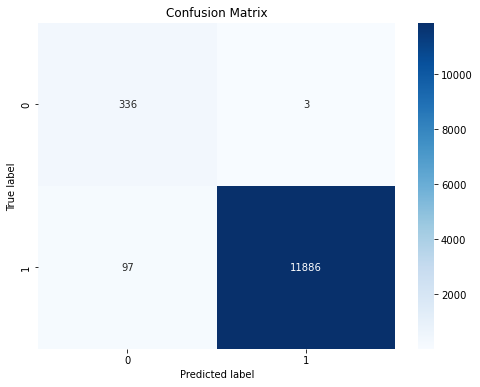

In [89]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_1, predictions1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.metrics import classification_report
#Report for KNN SKlearn
print(classification_report(y_test_1, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       339
           1       1.00      1.00      1.00     11983

    accuracy                           1.00     12322
   macro avg       0.95      0.99      0.97     12322
weighted avg       1.00      1.00      1.00     12322



In [91]:
#Report for KNN scratch
 
print(classification_report(y_test_1, predictions1))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       339
           1       1.00      0.99      1.00     11983

    accuracy                           0.99     12322
   macro avg       0.89      0.99      0.93     12322
weighted avg       0.99      0.99      0.99     12322



In [92]:
test_df=X_test[['item mean','user mean']]
test_df

,item mean,user mean
3,2.991054,2.0
4,2.991054,2.0
6,2.991054,2.0
8,2.991054,2.0
10,2.991054,2.0
...,...,...
169499,2.999414,2.0
169500,2.999414,3.0
169501,2.999414,2.0
169503,2.999414,2.0


### Predict

In [104]:
predictions2 = []
for knn_model in knn_models:
    predictions2s = knn_model.predict(test_df.values)
    predictions2.append(predictions2s)

In [105]:
predictions2 = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions2)

In [106]:
X_test['rating']=array_predict
X_test

,user1,item,rating,item mean,user mean
3,7,BD0101EN,0,2.991054,2.0
4,8,BD0101EN,0,2.991054,2.0
6,12,BD0101EN,0,2.991054,2.0
8,17,BD0101EN,0,2.991054,2.0
10,20,BD0101EN,0,2.991054,2.0
...,...,...,...,...,...
169499,2101673,PY0101EN,0,2.999414,2.0
169500,2102054,PY0101EN,1,2.999414,3.0
169501,2102356,PY0101EN,0,2.999414,2.0
169503,2102983,PY0101EN,0,2.999414,2.0


In [107]:
X_train

,user1,item,rating,item mean,user mean
0,2,BD0101EN,1,2.991054,2.704918
1,4,BD0101EN,0,2.991054,2.000000
2,5,BD0101EN,0,2.991054,2.000000
5,9,BD0101EN,0,2.991054,2.000000
7,16,BD0101EN,1,2.991054,2.888889
...,...,...,...,...,...
169482,2098743,PY0101EN,1,2.999414,3.000000
169484,2099019,PY0101EN,1,2.999414,3.000000
169493,2100731,PY0101EN,1,2.999414,3.000000
169498,2101601,PY0101EN,1,2.999414,3.000000


## Union 2 table after predict

In [108]:
df_final= pd.concat([X_train,X_test],axis=0)

In [109]:
value = {1:3,0:2}
df_final.replace(value,inplace=True)

In [110]:
df_final_matrix=df_final[['user1','item','rating']]

In [111]:
df_final_matrix1=pd.crosstab( df_final_matrix['item'],df_final_matrix['user1'],df_final_matrix.rating,aggfunc='sum')

# Final Matrix

In [112]:
df_final_matrix1

user1,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039
item,,,,,,,,,,,,,,,,,,,,,
BD0101EN,3,2,2,2,2,2,2,3,2,2,...,3,2,2,3,2,3,2,3,2,2
BD0111EN,2,2,2,2,2,2,2,3,2,2,...,3,2,2,3,2,3,2,3,2,2
DA0101EN,3,2,2,2,2,2,2,3,2,2,...,3,2,2,3,2,3,2,3,2,2
DS0101EN,2,2,2,2,2,2,2,3,2,2,...,3,2,2,3,2,3,2,3,2,2
PY0101EN,3,2,2,2,2,2,2,3,2,2,...,3,2,2,3,2,3,2,3,2,2


<center>
    <img src="https://img.freepik.com/free-vector/painted-thank-you-label-template_23-2148689616.jpg?t=st=1673570684~exp=1673571284~hmac=d9767d0d3483de5a3bb262e6506b3673eb0608b0ddc36bf41754a9020abf18dd" width="500"/>
</center>

##### 